In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import torch.nn.functional as F
import matplotlib.pyplot as plt

from autoencoder3 import Autoencoder_cnn3, VAE3
from stacked_mnist import StackedMNISTData, DataMode
from verification_net import VerificationNet


import warnings
warnings.filterwarnings('ignore', category=Warning)

In [2]:
gen = StackedMNISTData(mode=DataMode.MONO_BINARY_COMPLETE, default_batch_size=10)

In [3]:
#model = Autoencoder_cnn3(n_channels=1, criterion=nn.BCELoss(),latent_dim=8) 

Epoch:1, Loss:0.1738
Epoch:2, Loss:0.1530
Epoch:3, Loss:0.1457
Epoch:4, Loss:0.1401
Epoch:5, Loss:0.1358
Epoch:6, Loss:0.1323
Epoch:7, Loss:0.1292
Epoch:8, Loss:0.1265
Epoch:9, Loss:0.1239
Epoch:10, Loss:0.1218
Epoch:11, Loss:0.1194
Epoch:12, Loss:0.1174
Epoch:13, Loss:0.1150
Epoch:14, Loss:0.1130
Epoch:15, Loss:0.1109
Epoch:16, Loss:0.1093
Epoch:17, Loss:0.1071
Epoch:18, Loss:0.1057
Epoch:19, Loss:0.1043
Epoch:20, Loss:0.1028


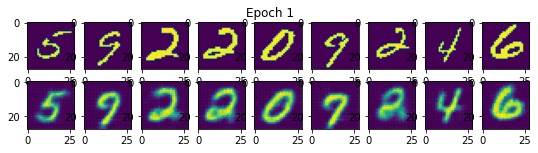

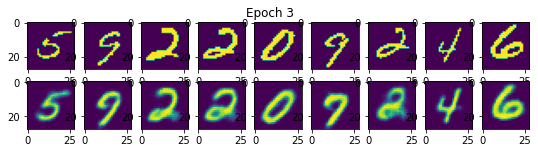

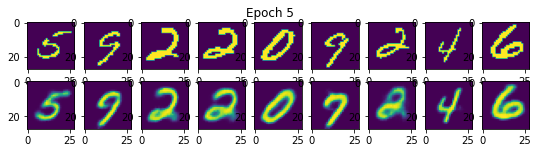

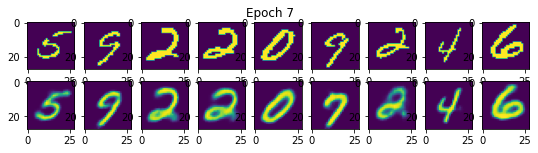

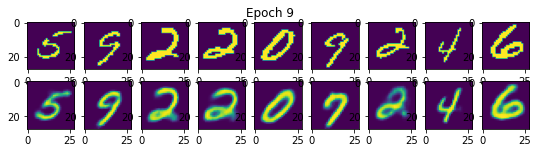

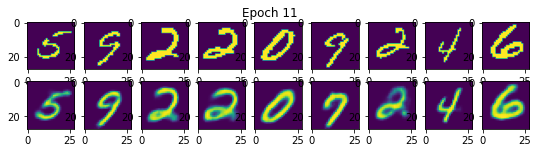

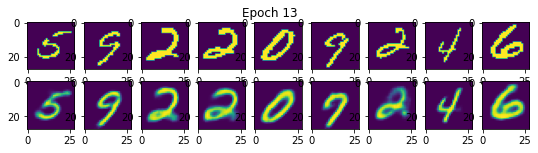

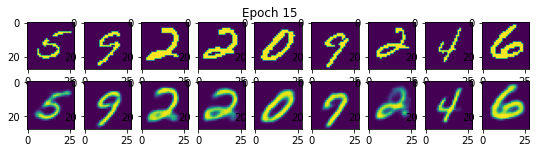

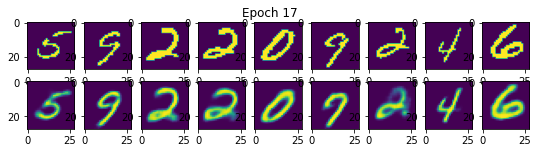

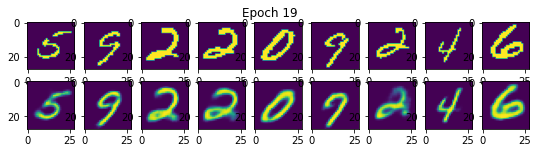

In [4]:
#model.fit(gen, epochs=20, visualize=True)

In [6]:
#model.save("autoencoders/model_1_3")

In [3]:
model = Autoencoder_cnn3.load("autoencoders/model_1_3", n_channels=1, criterion=nn.BCELoss(), latent_dim=8)

## Test set

In [4]:
test_set = gen.get_full_data_set(training = False)
test_img, test_cls = test_set

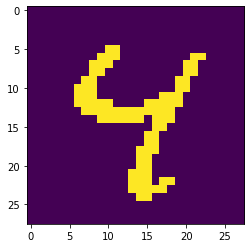

In [5]:
plt.imshow(test_img[6].astype(np.float32))

In [6]:
decoded = model(test_img)

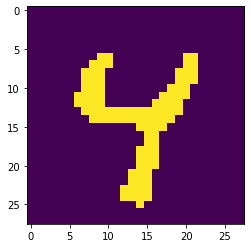

In [7]:
plt.imshow((decoded.detach().numpy()[6][0] >= 0.5).astype(np.int))

## Evaluation

In [2]:
net = VerificationNet("./models/verification_model")

In [9]:
decoded = decoded.squeeze(1)
decoded = np.expand_dims(decoded.detach().numpy(), axis=-1)

In [10]:
predictability, accuracy = net.check_predictability(data = decoded, correct_labels = test_cls)

313/313 [==============================] - 6s 18ms/step


In [11]:
print(f"Predictability is {predictability}. Accuracy is {accuracy}")

Predictability is 0.9625. Accuracy is 0.9257


# Autoencoder as generative model

In [12]:
generated_imgs = model.generate(14)

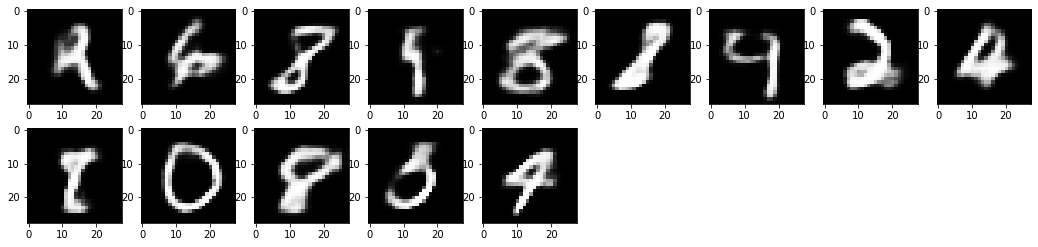

In [13]:
plt.figure(figsize=(18,4))
for i, item in enumerate(generated_imgs):
    plt.subplot(2,9,i+1)
    plt.imshow(np.transpose(item, (1, 2, 0)).astype(np.float), cmap="gray") 
    #plt.imshow((np.transpose(item, (1, 2, 0)) >=0.5).astype(np.int))

In [14]:
generated_imgs = model.generate(1000)
generated_imgs = generated_imgs.squeeze(1)
generated_imgs = np.expand_dims(generated_imgs, axis=-1)
predictability, accuracy = net.check_predictability(data = generated_imgs)
coverage = net.check_class_coverage(data=generated_imgs, tolerance=.8)
print(f"Predictability is {predictability}. Coverage is {coverage}")

32/32 [==============================] - 1s 16ms/step
Predictability is 0.757. Coverage is 1.0


# Autoencoder as anomaly detector

In [15]:
gen_miss = StackedMNISTData(mode=DataMode.MONO_BINARY_MISSING, default_batch_size=10)

Epoch:1, Loss:0.2152
Epoch:2, Loss:0.1954
Epoch:3, Loss:0.1770
Epoch:4, Loss:0.1825
Epoch:5, Loss:0.1653
Epoch:6, Loss:0.1401
Epoch:7, Loss:0.1311
Epoch:8, Loss:0.1253
Epoch:9, Loss:0.1161
Epoch:10, Loss:0.1118
Epoch:11, Loss:0.1097
Epoch:12, Loss:0.1065
Epoch:13, Loss:0.0979
Epoch:14, Loss:0.0932
Epoch:15, Loss:0.0937
Epoch:16, Loss:0.0938
Epoch:17, Loss:0.0925
Epoch:18, Loss:0.0877
Epoch:19, Loss:0.0783
Epoch:20, Loss:0.0741


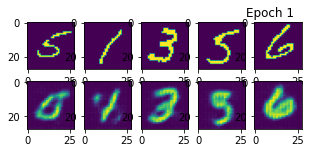

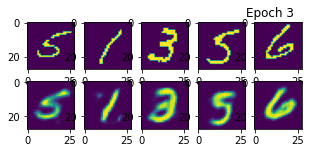

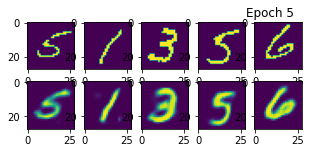

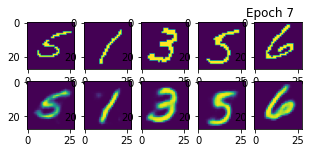

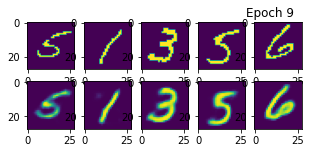

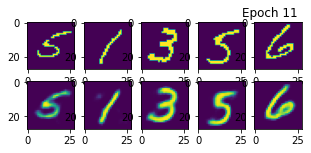

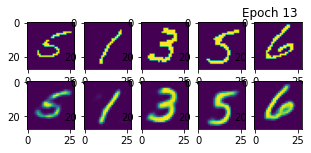

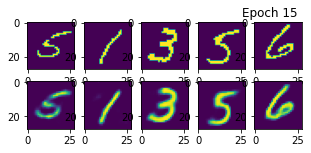

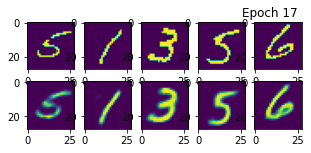

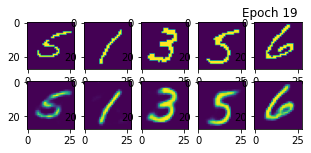

In [17]:
#model_miss = Autoencoder_cnn3(n_channels=1, criterion=nn.BCELoss(),latent_dim=8)
#model_miss.fit(gen_miss, epochs=20, visualize=True)

In [18]:
#model_miss.save("autoencoders/model_miss_3")

In [16]:
model_miss = Autoencoder_cnn3.load("autoencoders/model_miss_3", n_channels=1,criterion=nn.BCELoss(), latent_dim=8)

In [17]:
test_set = gen_miss.get_full_data_set(training = False)
test_img, test_cls = test_set

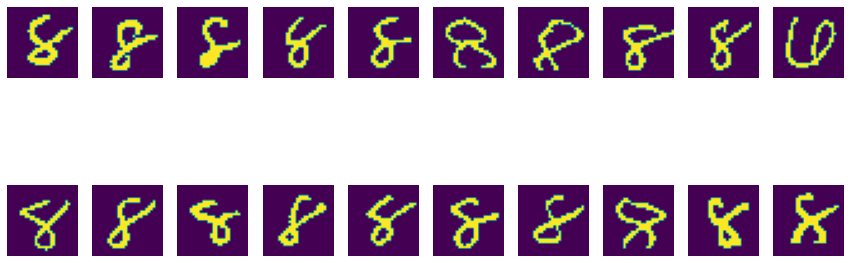

In [18]:
anomalies = model_miss.get_top_k_anomalious(imgs=test_img,k=20,show=True)

## Stacked 

In [19]:
gen = StackedMNISTData(mode=DataMode.COLOR_BINARY_COMPLETE)

In [20]:
train_img, train_cls = gen.get_full_data_set(training = True)

In [21]:
gen = StackedMNISTData(mode=DataMode.COLOR_BINARY_COMPLETE, default_batch_size=32)

Epoch:1, Loss:0.1333
Epoch:2, Loss:0.1202
Epoch:3, Loss:0.1155
Epoch:4, Loss:0.1118
Epoch:5, Loss:0.1091
Epoch:6, Loss:0.1065
Epoch:7, Loss:0.1045
Epoch:8, Loss:0.1026
Epoch:9, Loss:0.1013
Epoch:10, Loss:0.0998
Epoch:11, Loss:0.0986
Epoch:12, Loss:0.0972
Epoch:13, Loss:0.0959
Epoch:14, Loss:0.0949
Epoch:15, Loss:0.0939
Epoch:16, Loss:0.0932
Epoch:17, Loss:0.0922
Epoch:18, Loss:0.0915
Epoch:19, Loss:0.0908
Epoch:20, Loss:0.0902


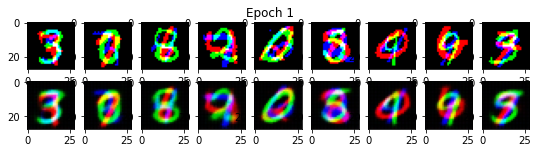

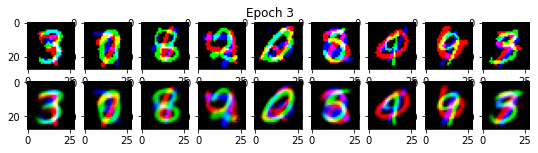

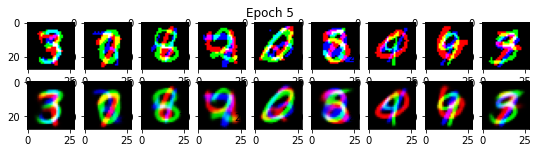

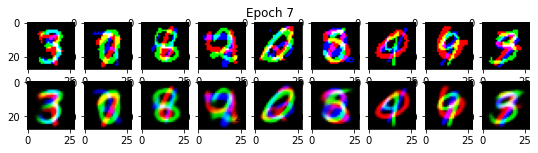

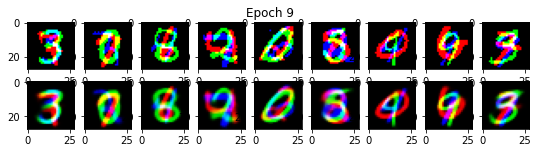

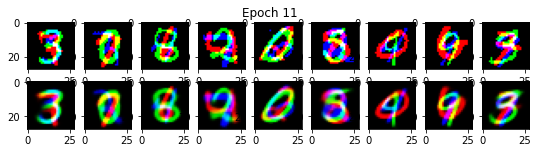

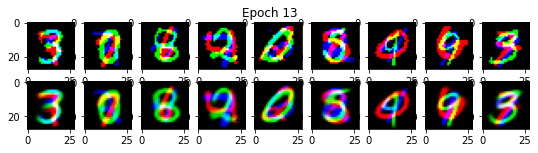

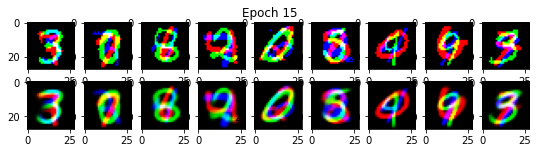

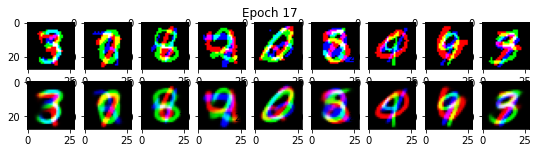

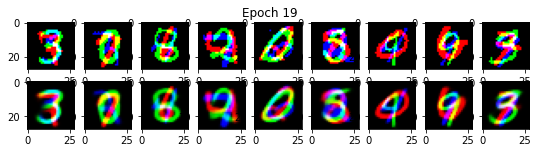

In [23]:
#model_rgb = Autoencoder_cnn3(n_channels=3,criterion=nn.BCELoss(), latent_dim=8)
#model_rgb.fit(gen, epochs=20, visualize=True)

In [24]:
#model_rgb.save("autoencoders/model_rgb_3")

In [22]:
model_rgb = Autoencoder_cnn3.load("autoencoders/model_rgb_3", n_channels=3, criterion=nn.BCELoss(), latent_dim=8)

## Test set

In [23]:
test_set = gen.get_full_data_set(training = False)
test_img, test_cls = test_set

In [24]:
decoded = model_rgb(test_img)

In [25]:
decoded = decoded.detach().numpy()

In [26]:
decoded.shape

(10000, 3, 28, 28)

In [27]:
predictability, accuracy = net.check_predictability(data = decoded.transpose((0,2,3,1)), correct_labels = test_cls, tolerance=0.5)

313/313 [==============================] - 5s 17ms/step


In [28]:
print(f"Predictability is {predictability}. Accuracy is {accuracy}")

Predictability is 0.9762. Accuracy is 0.849


# AE as generative model

In [29]:
generated_imgs = model_rgb.generate(10)

In [30]:
generated_imgs.shape

(10, 3, 28, 28)

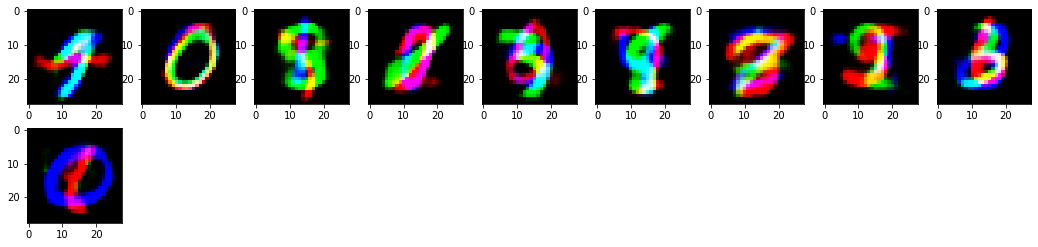

In [31]:
plt.figure(figsize=(18,4))
for i, item in enumerate(generated_imgs):
    plt.subplot(2,9,i+1)
    plt.imshow(np.transpose(item, (1, 2, 0)).astype(np.float)) 

In [32]:
generated_imgs = model_rgb.generate(1000)
predictability, accuracy =  net.check_predictability(data = generated_imgs.transpose((0,2,3,1)))
coverage = net.check_class_coverage(data=generated_imgs.transpose((0,2,3,1)), tolerance=.5)
print(f"Predictability is {predictability}. Coverage is {coverage}")

32/32 [==============================] - 1s 15ms/step
Predictability is 0.391. Coverage is 0.522


# Stacked AE as Anomaly Detector

In [33]:
gen_miss_stacked = StackedMNISTData(mode=DataMode.COLOR_BINARY_MISSING, default_batch_size=10)

Epoch:1, Loss:0.1978
Epoch:2, Loss:0.1587
Epoch:3, Loss:0.1361
Epoch:4, Loss:0.1239
Epoch:5, Loss:0.1122
Epoch:6, Loss:0.0928
Epoch:7, Loss:0.0867
Epoch:8, Loss:0.0810
Epoch:9, Loss:0.0779
Epoch:10, Loss:0.0759
Epoch:11, Loss:0.0691
Epoch:12, Loss:0.0682
Epoch:13, Loss:0.0683
Epoch:14, Loss:0.0676
Epoch:15, Loss:0.0614
Epoch:16, Loss:0.0628
Epoch:17, Loss:0.0596
Epoch:18, Loss:0.0554
Epoch:19, Loss:0.0537
Epoch:20, Loss:0.0528


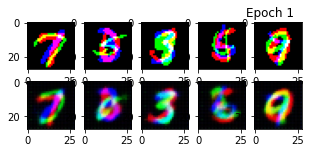

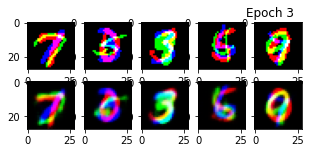

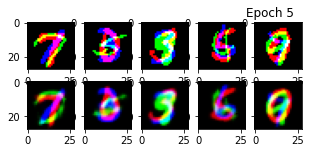

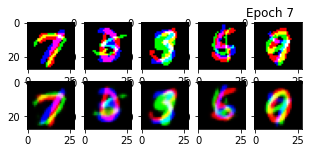

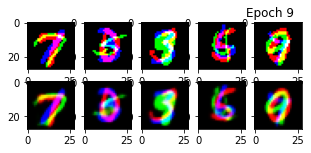

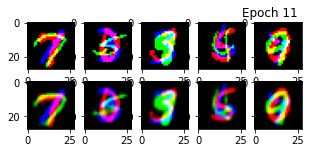

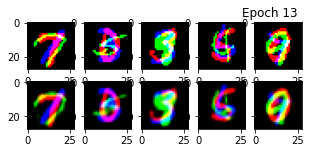

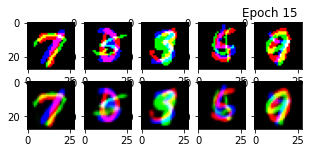

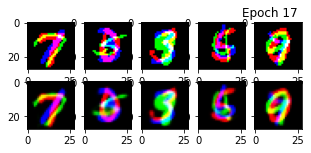

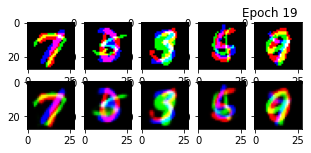

In [51]:
#model_miss_stacked = Autoencoder_cnn3(n_channels=3, criterion=nn.BCELoss(),latent_dim=8)
#model_miss_stacked.fit(gen_miss_stacked, epochs=20, visualize=True)

In [52]:
#model_miss_stacked.save("autoencoders/model_miss_stacked_3")

In [34]:
model_miss_stacked = Autoencoder_cnn3.load("autoencoders/model_miss_stacked_3", n_channels=3, criterion=nn.BCELoss(), latent_dim=8)

In [35]:
test_set = gen_miss_stacked.get_full_data_set(training = False)
test_img, test_cls = test_set

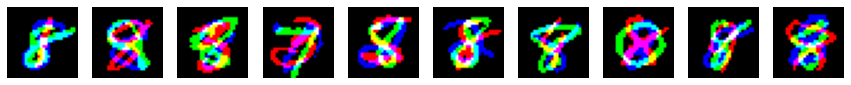

In [36]:
anomalies = model_miss_stacked.get_top_k_anomalious(test_img,10, show=True)

# VAE

In [3]:
gen = StackedMNISTData(mode=DataMode.MONO_BINARY_COMPLETE, default_batch_size=10)

In [7]:
vae = VAE3(n_channels=1, criterion=nn.BCELoss(), latent_dim=4)
vae.fit(gen, epochs=20, visualize=True, kl_div_weight = 0.01)

Epoch:1, Reconstruction Loss:0.2379.                   KL-div loss: 2.4536                   Loss: 0.2624
Epoch:2, Reconstruction Loss:0.2229.                   KL-div loss: 3.2783                   Loss: 0.2557
Epoch:3, Reconstruction Loss:0.2200.                   KL-div loss: 3.6244                   Loss: 0.2563
Epoch:4, Reconstruction Loss:0.2125.                   KL-div loss: 3.9299                   Loss: 0.2518
Epoch:5, Reconstruction Loss:0.2102.                   KL-div loss: 4.1261                   Loss: 0.2514
Epoch:6, Reconstruction Loss:0.2041.                   KL-div loss: 4.1479                   Loss: 0.2456
Epoch:7, Reconstruction Loss:0.1987.                   KL-div loss: 4.2915                   Loss: 0.2416
Epoch:8, Reconstruction Loss:0.1896.                   KL-div loss: 4.2602                   Loss: 0.2322
Epoch:9, Reconstruction Loss:0.1912.                   KL-div loss: 4.3685                   Loss: 0.2349
Epoch:10, Reconstruction Loss:0.1876.         

KeyboardInterrupt: 

In [15]:
vae.save("autoencoders/vae_3")

In [16]:
vae = VAE3.load("autoencoders/vae_3", n_channels=1, criterion=nn.BCELoss(),latent_dim=8)

In [17]:
test_set = gen.get_full_data_set(training = False)
test_img, test_cls = test_set

In [18]:
encoded, z_mean, z_log, decoded = vae(test_img)

In [19]:
decoded = decoded.squeeze(1)
decoded = np.expand_dims(decoded.detach().numpy(), axis=-1)

In [20]:
predictability, accuracy = net.check_predictability(data = decoded, correct_labels = test_cls)

313/313 [==============================] - 5s 16ms/step


In [21]:
print(f"Predictability is {predictability}. Accuracy is {accuracy}")

Predictability is 0.8891. Accuracy is 0.7432


# VAE as image generator

In [32]:
generated_imgs = vae.generate(14)

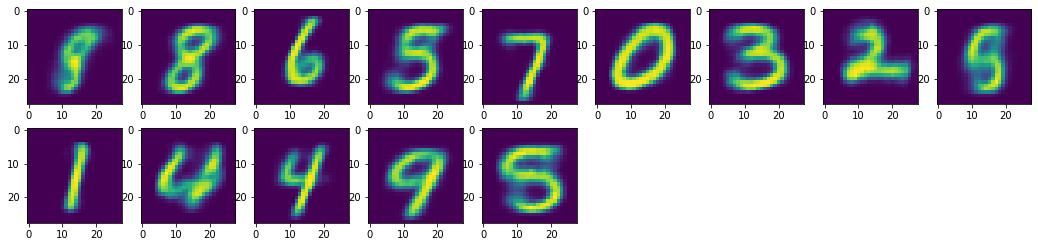

In [33]:
plt.figure(figsize=(18,4))
for i, item in enumerate(generated_imgs):
    plt.subplot(2,9,i+1)
    plt.imshow(np.transpose(item, (1, 2, 0)).astype(np.float)) 

In [24]:
generated_imgs = vae.generate(1000)

In [25]:
generated_imgs.shape

(1000, 1, 28, 28)

In [26]:
generated_imgs = generated_imgs.squeeze(1)
generated_imgs = np.expand_dims(generated_imgs, axis=-1)

In [27]:
predictability, accuracy = net.check_predictability(data = generated_imgs)
coverage = net.check_class_coverage(data=generated_imgs, tolerance=.8)
print(f"Predictability is {predictability}. Coverage is {coverage}")

32/32 [==============================] - 1s 16ms/step
Predictability is 0.828. Coverage is 1.0
